<a href="https://colab.research.google.com/github/ShreshthaJha6/MachineLearning/blob/main/Assignment1_Shreshtha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK1- to perform image augmentation techniques on the given pic
#TASK2- to implement frame extraction on a video
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#import necessary libraries.
import os #provides a way to interact with the operating system
import cv2 # module import name for opencv-python
import matplotlib.pyplot as plt #to show images

### **TASK: CONVERT VIDEO/GIF TO FRAMES**


In [ ]:
#using the duck gif
gif= cv2.VideoCapture('/content/drive/MyDrive/duck.gif')

In [ ]:
#creating a folder to store all the frames.
#using os.mkdir(), in the try block you make a directory
try:
  if not os.path.exists('videoframes'):
    os.makedirs('videoframes')
except OSError:
  print('error in creating video frames directory')

In [ ]:
#TO EXTRACT FRAMES
frame_current=0 #to keep the count of created frames
while gif.isOpened():
  #ret is a boolean that returns true if frame is available
  #frame is an image array vector captured based on the default frames per second defined explicitly or implicitly
  ret,frame=gif.read()
  if ret:
    #creating frames
    name='./videoframes/frame'+str(frame_current)+'.png'
    print('creating....'+name)

    #saving the images in a device. using cv2.imwrite()
    cv2.imwrite(name,frame)

    frame_current+=1 #increment the frame no.
  else:
    break

creating...../videoframes/frame0.png
creating...../videoframes/frame1.png
creating...../videoframes/frame2.png
creating...../videoframes/frame3.png
creating...../videoframes/frame4.png
creating...../videoframes/frame5.png
creating...../videoframes/frame6.png
creating...../videoframes/frame7.png
creating...../videoframes/frame8.png
creating...../videoframes/frame9.png
creating...../videoframes/frame10.png
creating...../videoframes/frame11.png
creating...../videoframes/frame12.png
creating...../videoframes/frame13.png
creating...../videoframes/frame14.png


In [ ]:
#release the resources we have initialised for our code
gif.release()
cv2.destroyAllWindows()

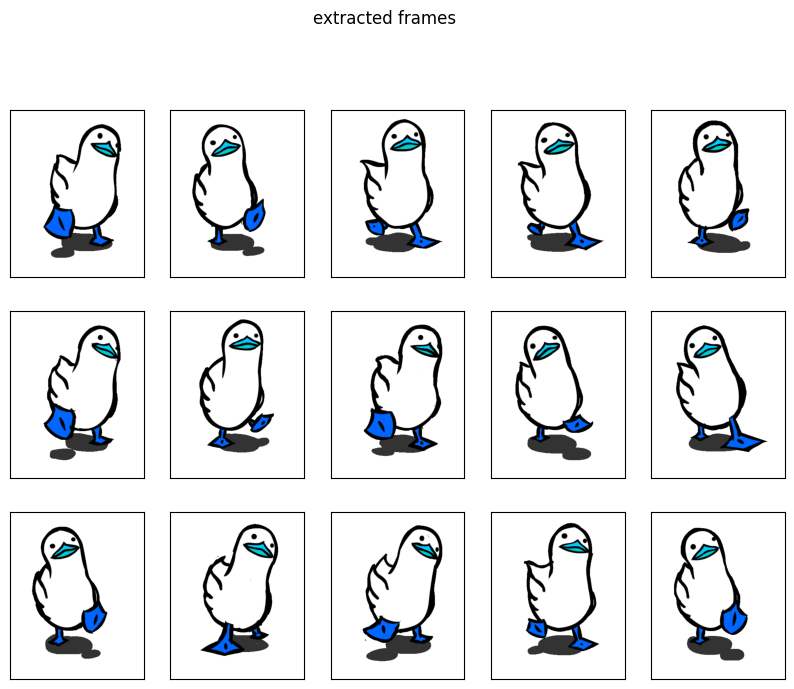

In [ ]:
#TO DISPLAY ALL THE FRAMES IN THE VIDEO FRAMES FOLDER
#creating a list(images) containing all the images
frame_folder='/content/videoframes'
images=[]
for filename in os.listdir(frame_folder):
  img=cv2.imread(os.path.join(frame_folder,filename))
  if img is not None:
    images.append(img)
plt.figure(figsize=(10,10))
columns=5
for i, image in enumerate(images):
  plt.subplot(int(len(images)/columns+1),columns,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
plt.suptitle("extracted frames")
plt.show()

## Variable frame rate

In [ ]:
def get_frames(video_path, fs=0):
  capture=cv2.VideoCapture(video_path)
  try:
    #creating a folder names duck_fps
    if not os.path.exists('duck_fps'):
      os.makedirs('duck_fps')

    #if not created, raise an error
  except OSError:
    print('error in creating directory')
  i=0
  skip_frame=fs #to set the no. of frames to be skipped
  frame_count=0 #to keep track of no. of frames
  while capture.isOpened():
    ret, frame= capture.read()
    if not ret:
      break
    #skip unwanted frames
    if i>skip_frame-1:
      if skip_frame==0:
        name='./duck_fps/frame'+str(frame_count+skip_frame)+'.png'
        frame_count+=1
      else:
        name='./duck_fps/frame'+str(frame_count*skip_frame)+'.png'
        frame_count+=1
      cv2.imwrite(name,frame)
      print(name)
      i=0
      continue
    i+=1
  capture.release()
  cv2.destroyAllWindows()


In [ ]:
get_frames("/content/drive/MyDrive/duck.gif",2)

./duck_fps/frame0.png
./duck_fps/frame2.png
./duck_fps/frame4.png
./duck_fps/frame6.png
./duck_fps/frame8.png


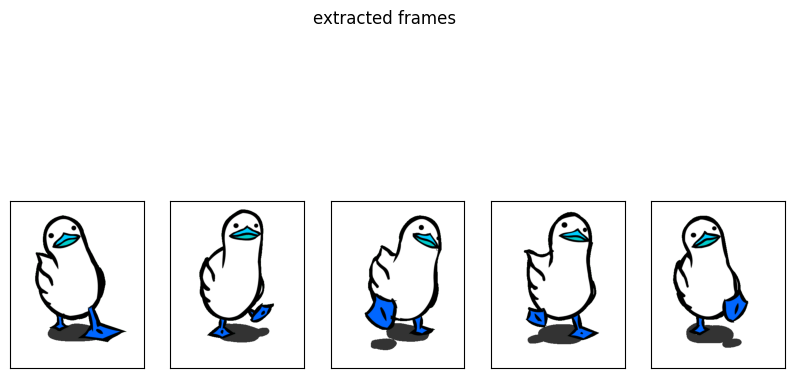

In [ ]:
#to display all the images in duck_fps -- folder with variable frame rate
frame_folder='/content/duck_fps'
images=[]
for filename in os.listdir(frame_folder):
  img=cv2.imread(os.path.join(frame_folder,filename))
  if img is not None:
    images.append(img)
plt.figure(figsize=(10,10))
columns=5
for i, image in enumerate(images):
  plt.subplot(int(len(images)/columns+1),columns,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
plt.suptitle("extracted frames")
plt.show()

##Frame to Video(with different sized images)

In [ ]:
!pip install natsort #to sort the extracted frame images array to compile into video

In [ ]:
from natsort import natsorted

def get_video(image_folder,video_name):
  images=[img for img in os.listdir(image_folder) if img.endswith(".png")]

  frame=cv2.imread(os.path.join(image_folder,images[0]))
  height,width,layers=frame.shape
  shape=(width,height)
  #sort frames in acsending order
  images=natsorted(images)
  images=natsorted(images)
  #VideoWriter arguments
  #filename: The name for the output video.
  #fourcc: 4-character code of codec used to compress the frames.
  #In order to encode the video in Python, a four characters string is used to define the coding method
  #fps: Frame rate of the output video.
  #frame_size: Size of the output video frames (width, height).

  video=cv2.VideoWriter(video_name,cv2.VideoWriter_fourcc(*'XVID'),2,shape)

  for image in images:
    img=cv2.imread(os.path.join(image_folder,image))
    resized=cv2.resize(img,shape)
    video.write(resized)
  video.release()
  cv2.destroyAllWindows()

In [ ]:
get_video('duck_fps','duck_fps.mp4') #will get video with variable frames combined

In [ ]:
get_video('videoframes','duckfinal.mp4')#will get the original video

##TASK: to implement frame extraction on a video

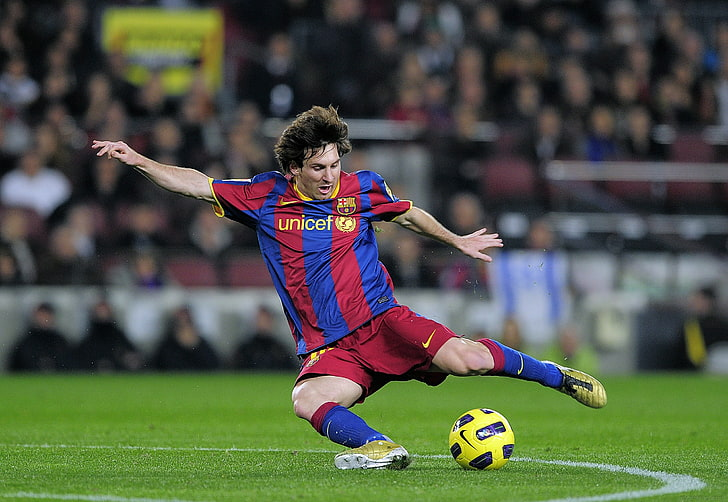

In [ ]:
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/drive/MyDrive/img.png')
cv2_imshow(image)

In [ ]:
#dimensions of image
dimensions= image.shape
print("dimensions : ",dimensions)
print("height : ",image.shape[0])
print("width : ",image.shape[1])
print("number of channels : ",image.shape[2])

dimensions :  (502, 728, 3)
height :  502
width :  728
number of channels :  3


Image in different colour spaces

grayscale


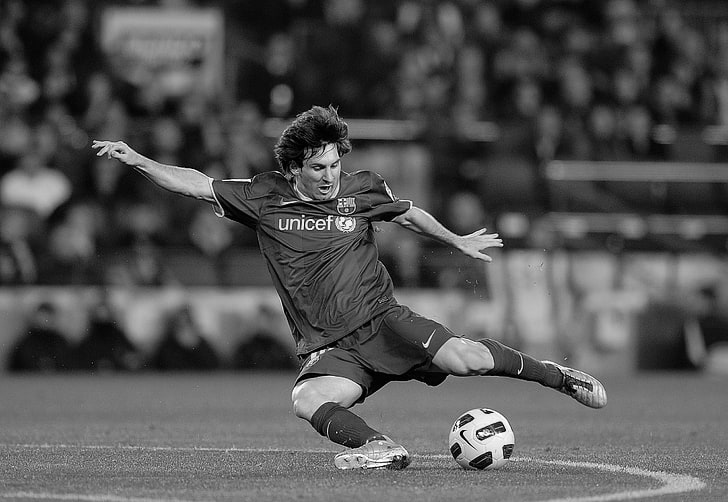

rgb


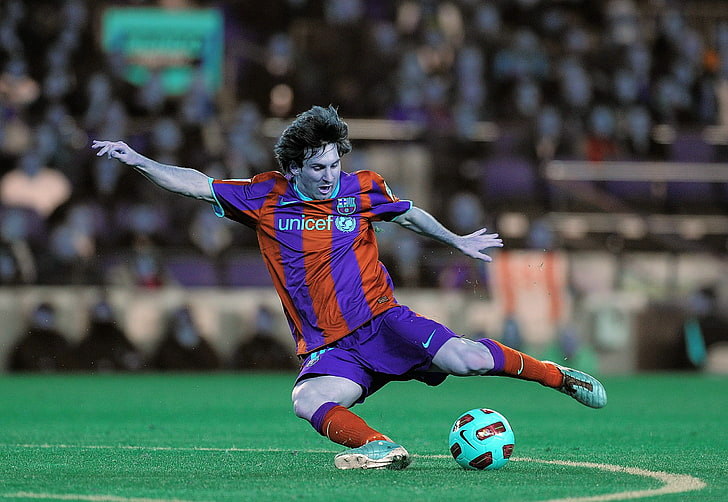

hsv


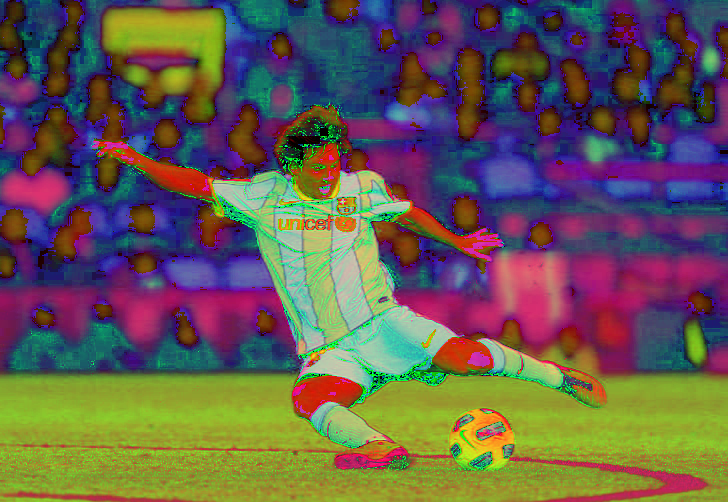

In [ ]:
#in grayscale
img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print("grayscale")
cv2_imshow(img_gray)
#in rgb-red green blue
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print("rgb")
cv2_imshow(img_rgb)
# in hsv- hue saturation value
img_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
print("hsv")
cv2_imshow(img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

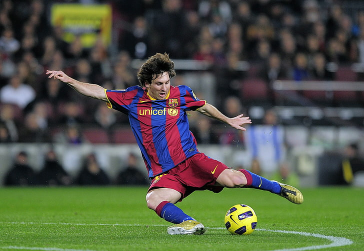

In [ ]:
#resize the image
image1=cv2.resize(image,(0,0),fx=0.5,fy=0.5)
cv2_imshow(image1)

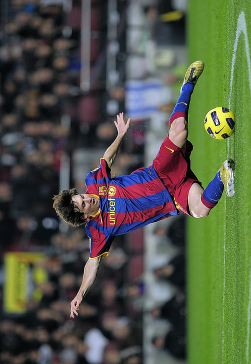

In [ ]:
image2=cv2.rotate(image1, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(image2)

COPYING THE BALL FROM RIGHT TO LEFT SIDE

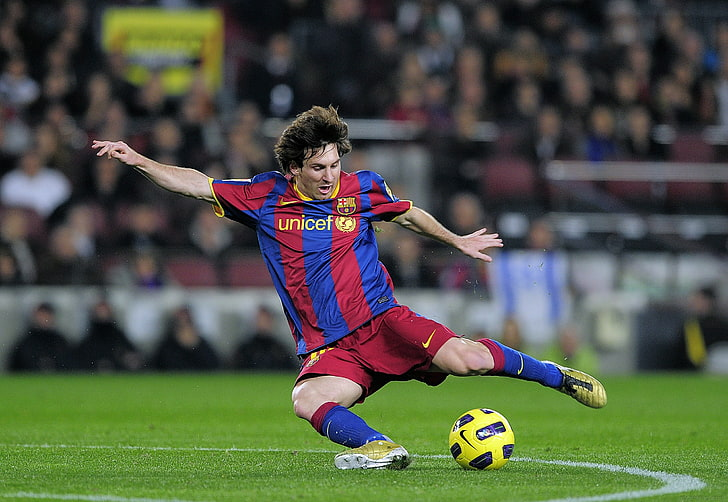

In [ ]:
import numpy as np
original_image=image
cv2_imshow(original_image)

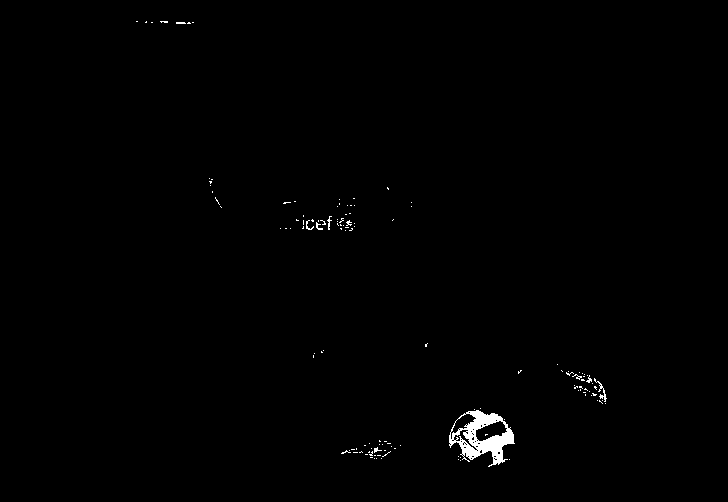

In [ ]:
#to extract the coordinates of the ball
#creating mask over yellow colour in hsv image
#creating a range in yellow colour
lower_yellow = np.array([30,50,180])
upper_yellow = np.array([40,255,255])
#creating mask
mask=cv2.inRange(img_hsv,lower_yellow,upper_yellow)
cv2_imshow(mask)

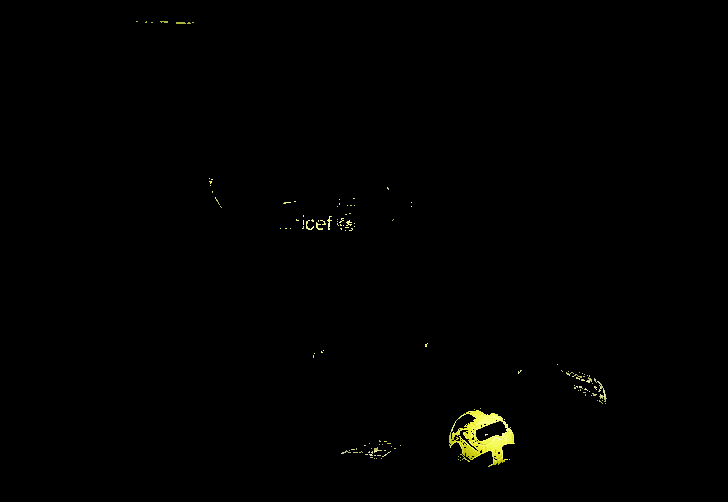

In [ ]:
#bitwise AND mask and original image operation #to see the yellow colour on masked image
result=cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(result)

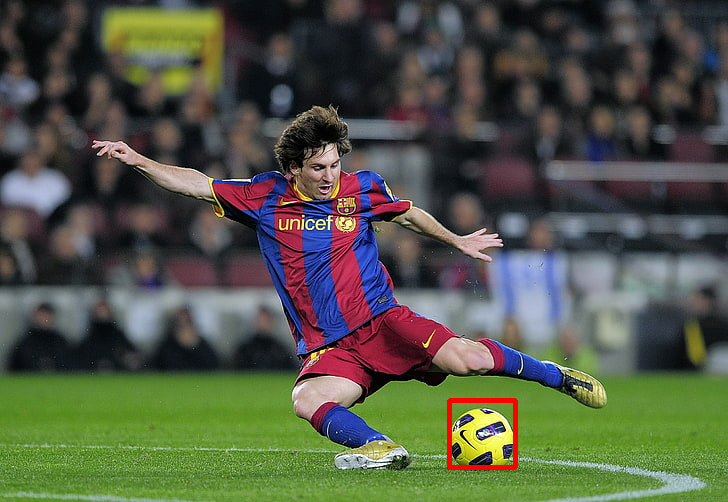

In [ ]:
#finding contour over the yellow football
#used to identify and highlight the largest contour (region) within a binary mask (likely representing a yellow object in an image)
contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#cv2.findContours is used to find
if contours: #checks if any contours were found in the binary mask.
    largest_contour = max(contours, key=cv2.contourArea)#finds the largest counter among the contours detected
    x, y, w, h = cv2.boundingRect(largest_contour)#calculates the rectangle for the largest contour
    im=image.copy()#creates a copy of the original image to draw the rectangle
    cv2.rectangle(im, (x, y-10), (x + w, y + h), (0, 0, 255), 3)#im=the image, (x,y-10):top-left of rect, then bottom-right of rect,
    #colour of rectangle=red, thickness=3
    cv2_imshow(im)

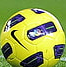

In [ ]:
#to extract the region of interest ROI--the yellow ball
football_ROI=image[y-10:y+h,x:x+w]
cv2_imshow(football_ROI)

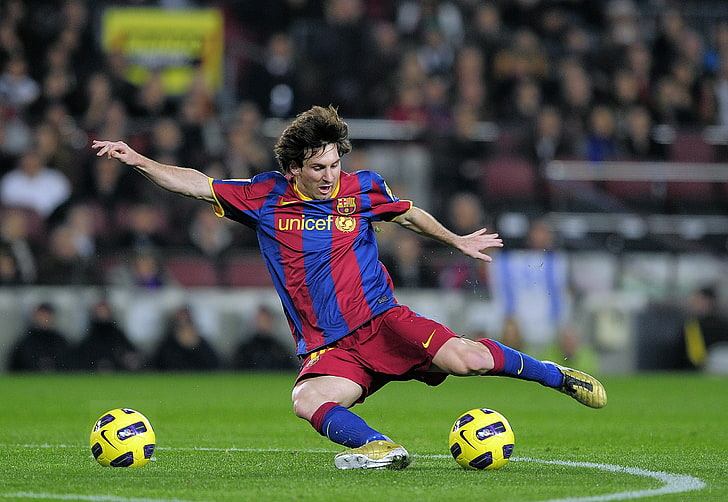

In [ ]:
#to paste the roi to the left-hand side
roi_height,roi_width=football_ROI.shape[0],football_ROI.shape[1] #assigning height and width
resultant_image=image.copy()#creating a duplicate image to preserve the original one
resultant_image[400:400+roi_height,90:90+roi_width]=football_ROI #pasting the roi image to left.
cv2_imshow(resultant_image)

## PERSPECTIVE TRANSFORMATION

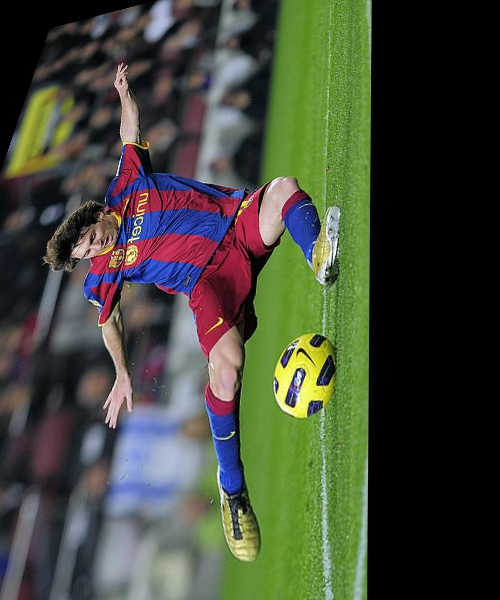

In [ ]:
#to show images from different angles-perspective transformation
input_pt=np.float32([[40,15],[250,15],[20,250],[300,300]])#points to transform in the original image
output_pt=np.float32([[50,50],[0,200],[200,0],[200,200]])#coordinates in the output image
#apply perspective transform
matrix=cv2.getPerspectiveTransform(input_pt,output_pt)
output_image=cv2.warpPerspective(image,matrix,(500,600))
cv2_imshow(output_image)

morphological image processing operations
###DILATION: adds pixels to the boundaries of objects in an image.  It's like inflating or thickening the shapes in the image.


---


###EROSION: removes pixels on object boundaries. It makes objects in an image appear smaller. It's like erasing or thinning out the shapes.


---


###OPENING: improves image quality by manipulating erosion and dilation processes. The image is first *eroded* then *diluted*. It needs two inputs- an image and a structuring element. Opening can be used to remove small objects from the foregroung of the image.

---


###CLOSING: defined as a *dilation* followed by an *erosion* using the same structuring element. It's used to close small gaps or holes in the objects.

---

###KERNEL: small matrix that is used to apply effects to an image. The kernel is also known as a convolution matrix or mask.  This is accomplished by doing a Convolution between the kernel and an image.

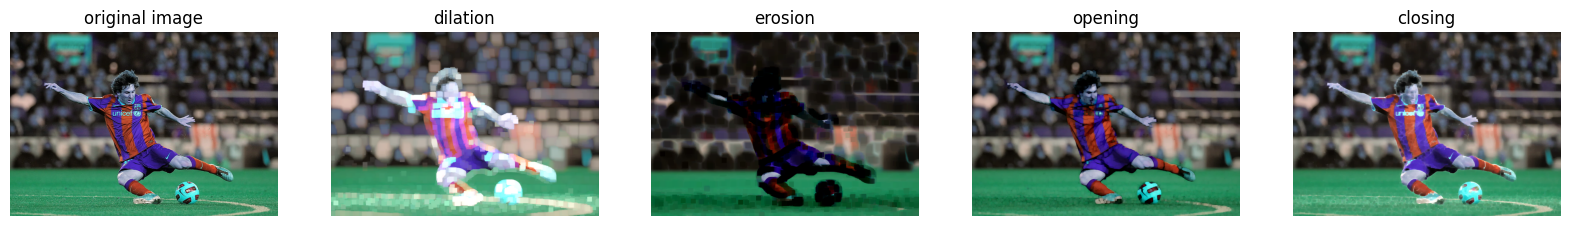

In [ ]:
#kernel
kernel= np.ones((5,5),dtype='int')
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title("original image")
plt.axis('off')
plt.imshow(image)
#dilation
img_dilation= cv2.dilate(image,kernel,iterations=3)
plt.subplot(1,5,2)
plt.title("dilation")
plt.axis('off')
plt.imshow(img_dilation)
#erosion
img_erosion=cv2.erode(image,kernel,iterations=3)
plt.subplot(1,5,3)
plt.title("erosion")
plt.axis('off')
plt.imshow(img_erosion)
#opening
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(1,5,4)
plt.title("opening")
plt.axis('off')
plt.imshow(opened_image)
#closing
closed_image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(1,5,5)
plt.title("closing")
plt.axis('off')
plt.imshow(closed_image)
plt.show()

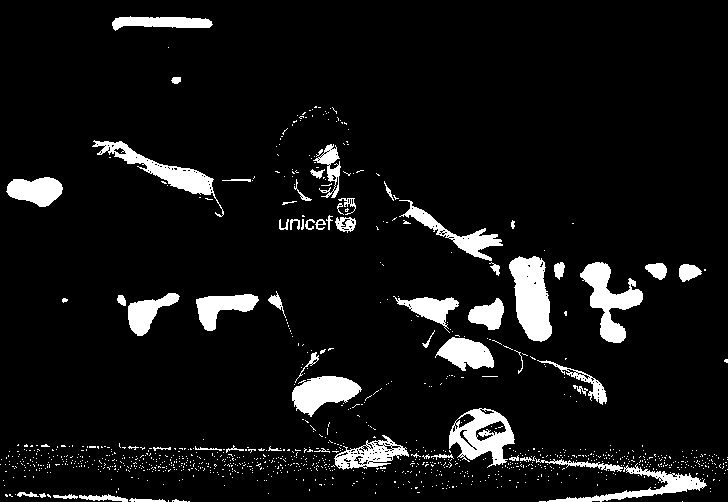

In [ ]:
#performing all the above operations on binary image
img_gray=cv2.cvtColor(np.array(image),cv2.COLOR_BGR2GRAY) #gray image
threshold=150 # pixels above the given mark will turn white, and below the mark will turn black
_, bin_image=cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
cv2_imshow(bin_image)

DILATION


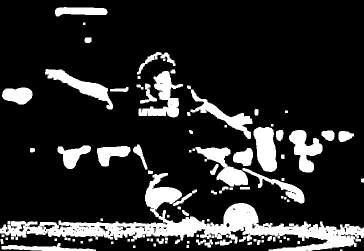

EROSION


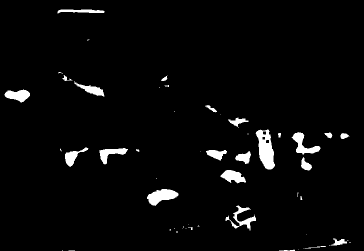

OPENING


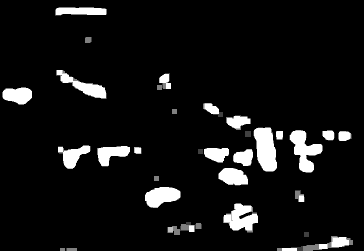

CLOSING


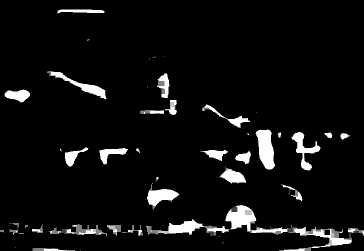

In [ ]:
#kernel defined above
#dilations
img_dilate=cv2.dilate(bin_image,kernel,iterations=1)
print("DILATION")
img_dilate=cv2.resize(img_dilate,(0,0),fx=0.5,fy=0.5)
cv2_imshow(img_dilate)
#erosions
img_erode=cv2.erode(bin_image,kernel,iterations=1)
print("EROSION")
img_erode=cv2.resize(img_erode,(0,0),fx=0.5,fy=0.5)
cv2_imshow(img_erode)
#opening erosion-dilation
img_open=cv2.dilate(img_erode,kernel,iterations=1)
print("OPENING")
cv2_imshow(img_open)
#closing dilation-erosion
img_close=cv2.erode(img_dilate,kernel,iterations=1)
print("CLOSING")
cv2_imshow(img_close)

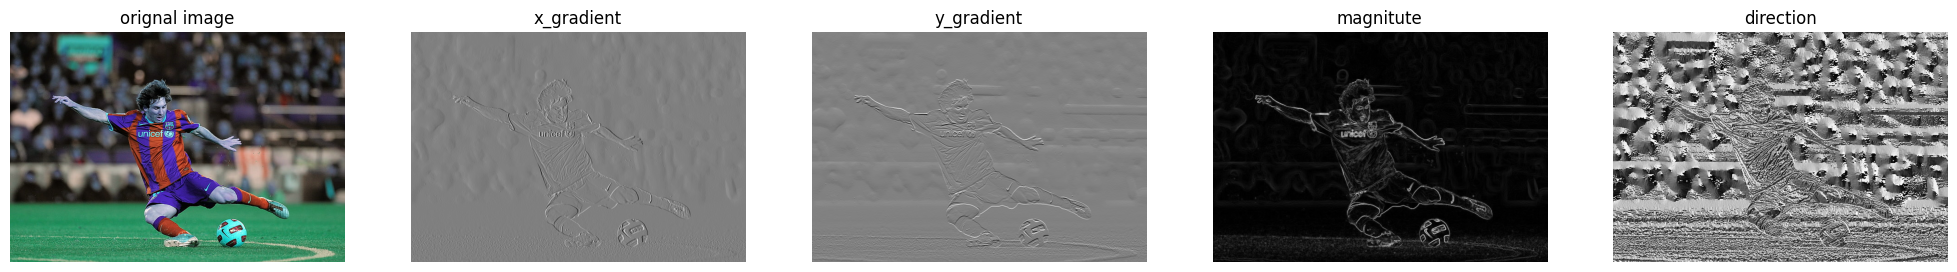

In [ ]:
#gradients : It quantifies how rapidly pixel values are transitioning from one intensity to another in the image.
#sobel gradient -in x and y direction
gradient_x= cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=3)#ksize= kernel size
gradient_y= cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=3)

#gradient magnitude
magn=np.sqrt(gradient_x**2+gradient_y**2)
#gradient_direction
dirn=phase=np.arctan2(gradient_y,gradient_x)

plt.figure(figsize=(25,5))
plt.subplot(151)
plt.title("orignal image")
plt.axis('off')
plt.imshow(image)
plt.subplot(152)
plt.title("x_gradient")
plt.axis('off')
plt.imshow(gradient_x,cmap='gray')
plt.subplot(153)
plt.title("y_gradient")
plt.axis("off")
plt.imshow(gradient_y,cmap="gray")
plt.subplot(154)
plt.title("magnitute")
plt.axis("off")
plt.imshow(magn,cmap='gray')
plt.subplot(155)
plt.title("direction")
plt.axis("off")
plt.imshow(dirn,cmap='gray')